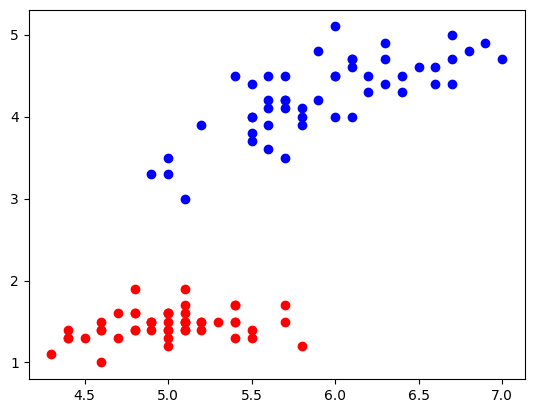

<ipython-input-2-4f8784dc28f4>:63: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=x[y == cl,0],y = x[y == cl,1],


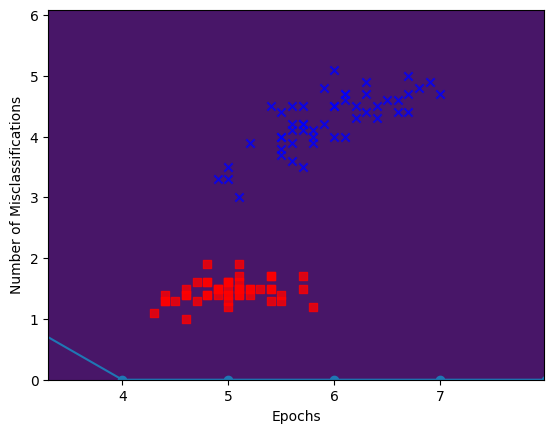

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap

class Perceptron(object):
  def __init__(self, Learn_Rate=0.5, Iterations=10):
    self.learn_rate = Learn_Rate
    self.Iterations = Iterations
    self.errors = []
    self.weights = np.zeros(1 + x.shape[1])

  def fit(self, x,y):
    self.weights = np.zeros(1 + x.shape[1])
    for i in range(self.Iterations):
      error = 0
      for xi, target in zip(x,y):
        update = self.learn_rate * (target - self.predict(xi))
        self.weights [1:] += update*xi
        self.weights [0] += update
        error += int(update != 0)
      self.errors.append(error)
    return self


  def net_input(self, x):
    return np.dot(x,self.weights[1:] + self.weights[0])

  def predict(self, x):
    return np.where(self.net_input(x) >= 0.0,1,-1)


y = pd.read_csv("iris.data", header=None)
x = y.iloc[0:100, [0,2]].values
plt.scatter(x[:50,0],x[:50,1],color='red')
plt.scatter(x[50:100,0], x[50:100,1],color='blue')
plt.scatter(x[100:150,0], x[100:150,1],color='yellow')
plt.show()
y = y.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1,1)

Classifier = Perceptron(Learn_Rate=0.01, Iterations=50)
Classifier.fit(x,y)
plt.plot(range(1, len(Classifier.errors) +1), Classifier.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of Misclassifications')
plt.show

def plot_decision_regions(x,y,classifier,resolution=0.02):
  markers = ('s','x','o','^','v')
  colors = ('red','blue','lightgreen','gray','cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])
  x1_min,x1_max = x[:,0].min() - 1, x[:,0].max() + 1
  x2_min,x2_max = x[:,1].min() - 1, x[:,1].max() + 1
  xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                        np.arange(x2_min,x2_max,resolution))
  Z = Classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1)
  plt.xlim(xx1.min(),xx1.max())
  plt.ylim(xx2.min(),xx2.max())
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=x[y == cl,0],y = x[y == cl,1],
                alpha=0.8,c = cmap(idx),
                marker=markers[idx] , label = cl )

plot_decision_regions(x,y,classifier=Classifier)
plt.show()






AttributeError: Line2D.set() got an unexpected keyword argument 'market'

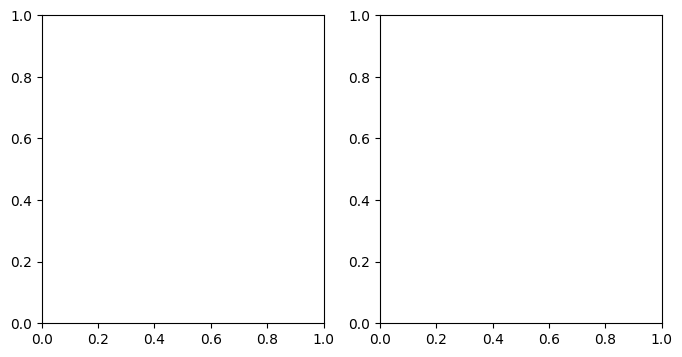

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class AdalineGD(object):



  def __init__(self, eta=0.01, n_iter=50):
    self.eta = eta
    self.n_iter = n_iter
  def fit(self,x ,y):
    self.w_ = np.zeros(1 + x.shape[1])
    self.cost_ = []

    for i in range(self.n_iter):
      output = self.net_input(x)
      errors = (y - output)
      self.w_[1:] += self.eta * x.T.dot(errors)
      self.w_[0] += self.eta * errors.sum()
      cost = (errors**2).sum() /2.0
      self.cost_.append(cost)
    return self

  def net_input(self,x):
    return np.dot(x, self.w_[1:]) + self.w_[0]





  def activation(self, x):
    return self.net_input(x)

  def predict(self, x):
    return np.where(self.activation(x) >= 0.0 , 1, -1)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(x,y)
ax[0].plot(range(1, len(ada1.cost_)+1),np.log10(ada1.cost_),marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Log(Sum-Squared-Error)')
ax[0].set_title('Adaline-Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta = 0.0001 ).fit(x,y)
ax[1].plot(range(1, len(ada2.cost_)+1),ada2.cost_,marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Log(Sum-Squared-Error)')
ax[1].set_title('Adaline-Learning rate 0.0001')

plt.tight_layout()
plt.show()









